In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
z_df = pd.read_csv('/Users/yash/Downloads/zomato.csv')
z_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
print(z_df.columns)

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


In [4]:
#changing names of some columns

z_df.rename(columns= {'approx_cost(for two people)': 'cost',
                     'listed_in(type)': 'type',
                     'listed_in(city)': 'city'}
           , inplace=True)

In [5]:
z_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [6]:
z_df.shape

(51717, 17)

In [7]:
z_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           51717 non-null  object
 1   address       51717 non-null  object
 2   name          51717 non-null  object
 3   online_order  51717 non-null  object
 4   book_table    51717 non-null  object
 5   rate          43942 non-null  object
 6   votes         51717 non-null  int64 
 7   phone         50509 non-null  object
 8   location      51696 non-null  object
 9   rest_type     51490 non-null  object
 10  dish_liked    23639 non-null  object
 11  cuisines      51672 non-null  object
 12  cost          51371 non-null  object
 13  reviews_list  51717 non-null  object
 14  menu_item     51717 non-null  object
 15  type          51717 non-null  object
 16  city          51717 non-null  object
dtypes: int64(1), object(16)
memory usage: 6.7+ MB


In [8]:
z_df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [9]:
#dropping url,phone, dish_liked as they are not needed for analysis
z_df.drop(['url','phone', 'dish_liked'], axis=1,inplace=True)


In [10]:
z_df.isnull().sum()

address            0
name               0
online_order       0
book_table         0
rate            7775
votes              0
location          21
rest_type        227
cuisines          45
cost             346
reviews_list       0
menu_item          0
type               0
city               0
dtype: int64

<AxesSubplot:>

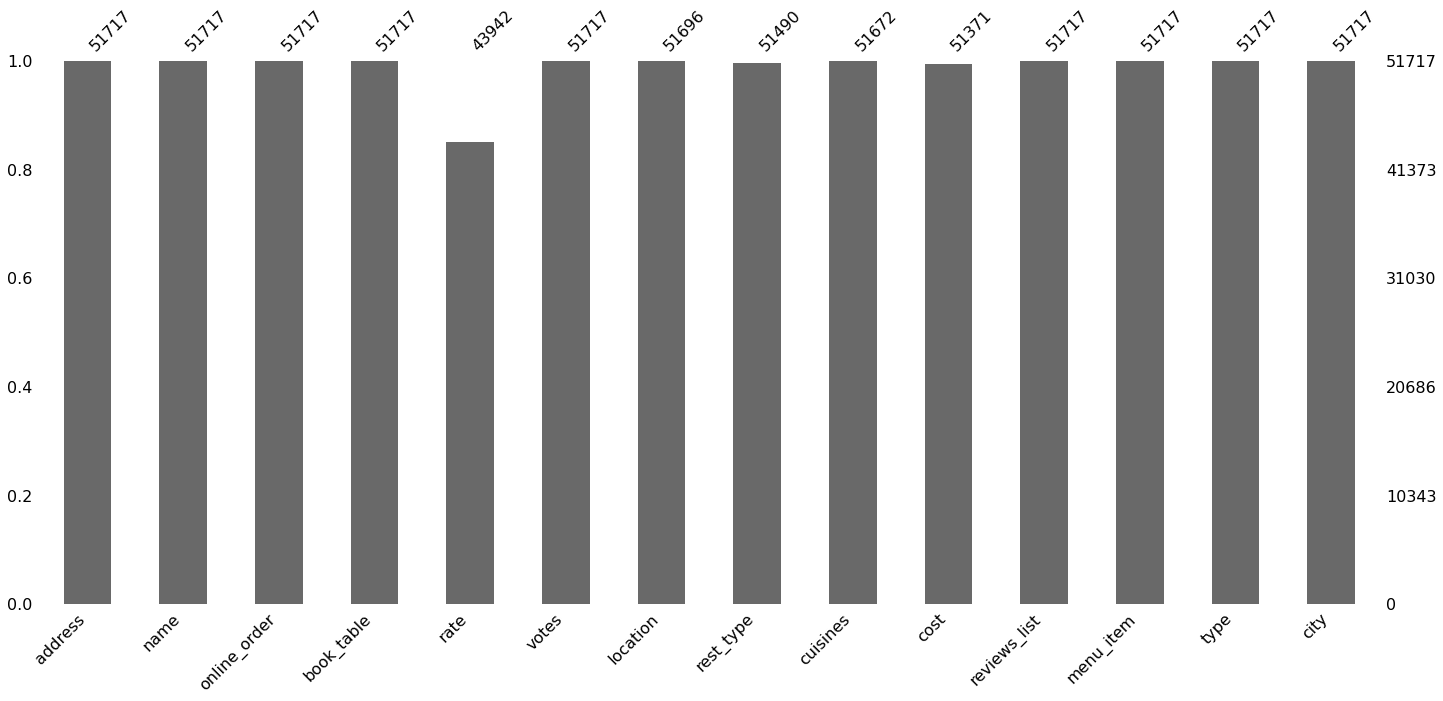

In [11]:
import missingno as msno
msno.bar(z_df)

In [12]:
#Dropping null values from the dataset

z_df.dropna(how='any', inplace=True)

In [13]:
z_df.dtypes

address         object
name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
cuisines        object
cost            object
reviews_list    object
menu_item       object
type            object
city            object
dtype: object

In [14]:
z_df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [15]:
# replaceing comma in cost and converting it into float datatype
z_df['cost'] = z_df['cost'].str.replace(",","").astype(float)

In [16]:
z_df['cost'].dtype

dtype('float64')

In [17]:
z_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
z_df.loc[z_df['rate'] =='NEW'].shape

(2205, 14)

In [19]:
z_df.loc[z_df['rate'] == '-'].shape

(65, 14)

In [20]:
#dropping rows where rate is 'NEW' or '-'

new_index = list(z_df.loc[z_df['rate'] =='NEW'].index)
_index    = list(z_df.loc[z_df['rate'] =='-'].index)

index = new_index + _index
len(index)

2270

In [21]:
z_df.drop(labels = index, axis=0, inplace = True)

In [22]:
z_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [23]:
#removing '/5' from rating
z_df['rate'] = z_df['rate'].str.replace("/5","").astype(float)

In [24]:
z_df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [25]:
z_df.shape

(41263, 14)

In [26]:
z_df.dtypes

address          object
name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [27]:
z_df['online_order'] = z_df['online_order'].replace(('Yes','No'), (True,False))

In [28]:
z_df['book_table'] = z_df['book_table'].replace(('Yes','No'), (True,False))

In [29]:
z_df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [30]:
#Encode the input Variables
def Encode(z_df):
    for column in z_df.columns[~z_df.columns.isin(['rate', 'cost', 'votes'])]:
        z_df[column] = z_df[column].factorize()[0] # or df['product_name'], mapping = df['product_name'].factorize(), that's why [0] is used because im only taking the labels throwing away the uniques that map back to i/p

    return z_df

z_en = Encode(z_df.copy())
z_en.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


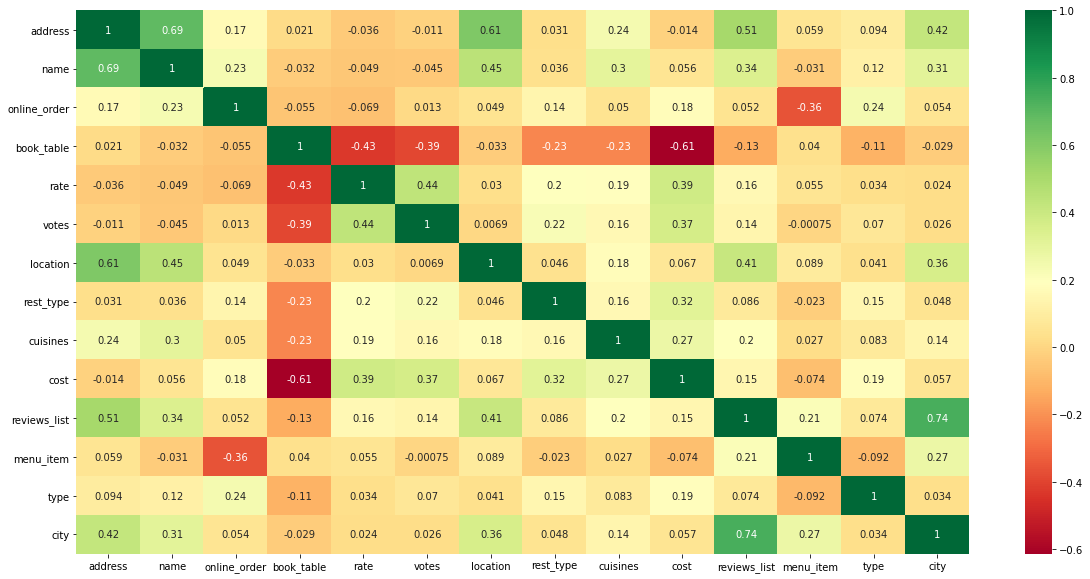

In [31]:
#correlation between variables
corrmat = z_en.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,10))
g = sns.heatmap(z_en.corr(), annot=True,cmap='RdYlGn')

# Exploratory Data Analysis

In [32]:
import warnings
warnings.filterwarnings('ignore')

### Restaurants delivering online or not

Text(0.5, 1.0, 'Restaurants delivering online or not')

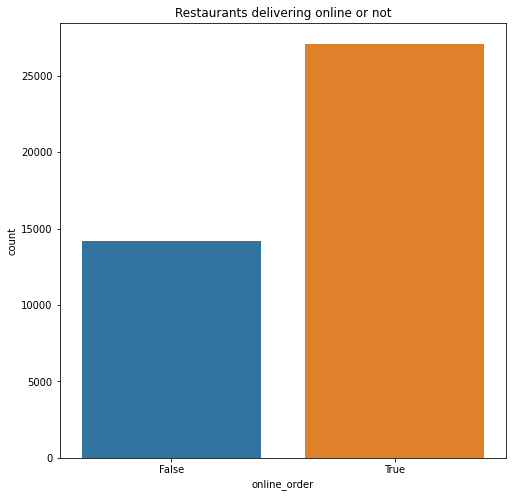

In [33]:
fig = plt.figure(figsize=(8,8))
sns.countplot(z_df['online_order'])
plt.title('Restaurants delivering online or not')

### Restaurants accepting online orders or not

In [34]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

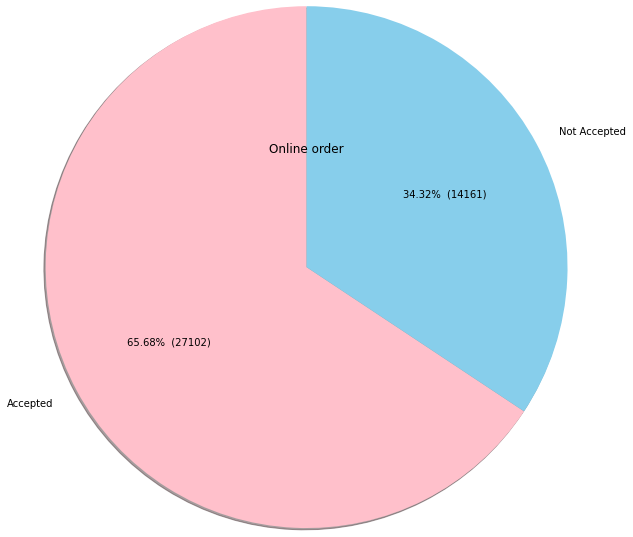

In [35]:
labels = ["Accepted",'Not Accepted']
values = z_df['online_order'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['pink', 'skyblue']
ax1.pie(values, labels=labels, autopct=make_autopct(values),shadow=True,
        startangle=90,colors=colors, radius=3)
plt.title('Online order')
plt.show()

### Table booking available or not

In [36]:
z_df['book_table'].value_counts()

False    34959
True      6304
Name: book_table, dtype: int64

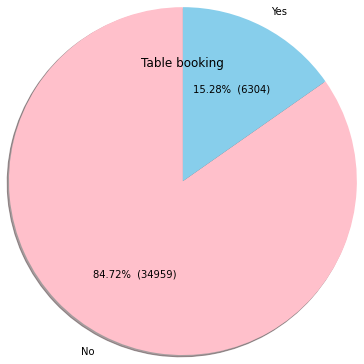

In [37]:
labels = ["No",'Yes']
values = z_df['book_table'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['pink', 'skyblue']
ax1.pie(values, labels=labels, autopct=make_autopct(values),
        shadow=True, startangle=90,colors=colors , radius = 2)
plt.title('Table booking')
plt.show()

### Location wise count of restaurants

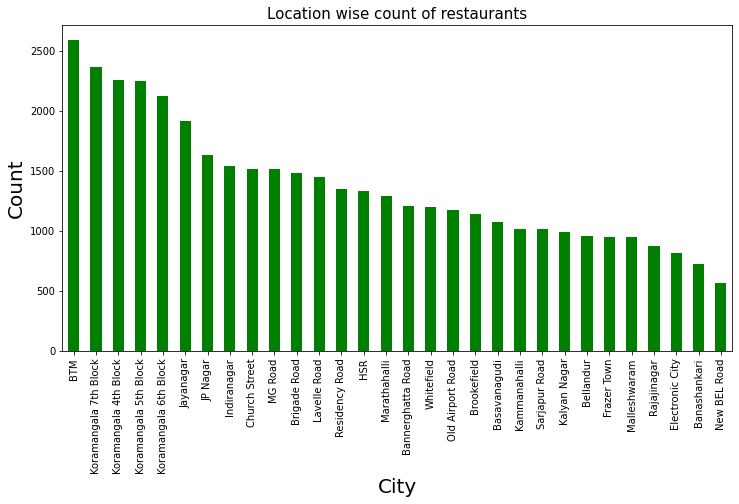

In [38]:
fig = plt.figure(figsize=(12,6))
z_df['city'].value_counts().plot(kind="bar", color= 'green')
plt.xlabel('City', size = 20)
plt.ylabel('Count', size = 20)
plt.title('Location wise count of restaurants',size=15) # In decending order
plt.show()

### Type of service provided by restaurants

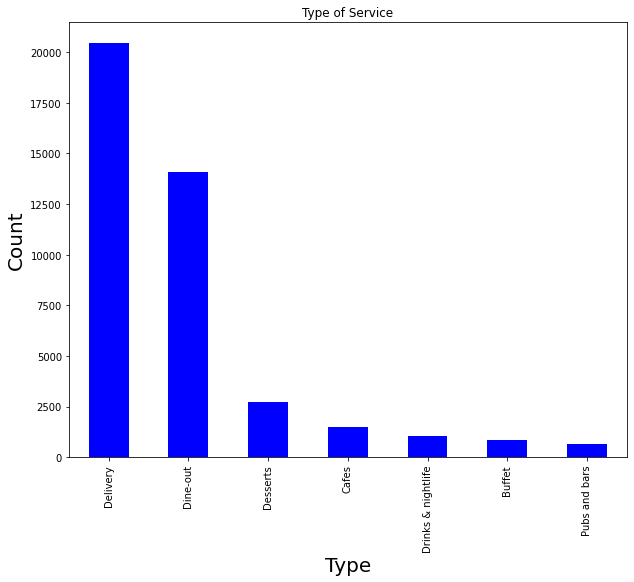

In [39]:
fig = plt.figure(figsize=(10,8))
z_df['type'].value_counts().plot(kind="bar", color= 'blue')
plt.xlabel('Type', size = 20)
plt.ylabel('Count', size = 20)
plt.title('Type of Service')
plt.show()

### Location wise distribution

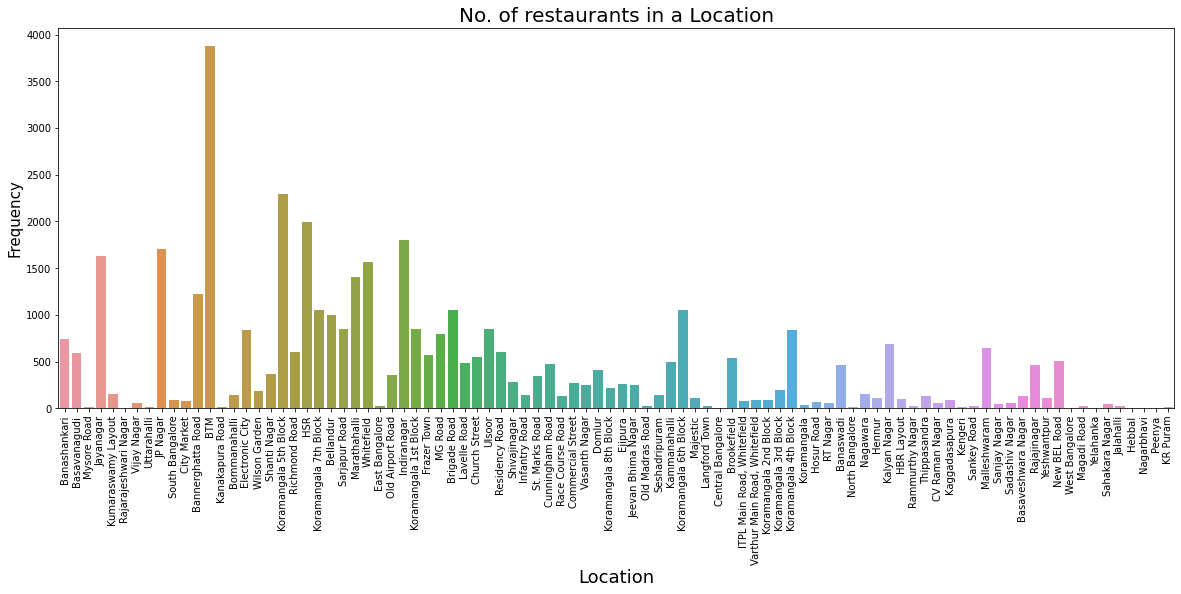

In [40]:
fig = plt.figure(figsize=(20,7))
sns.countplot(z_df['location'])
plt.xticks(rotation=90)
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
plt.title('No. of restaurants in a Location', size = 20)
plt.show()

### Number of restaurants at a Location

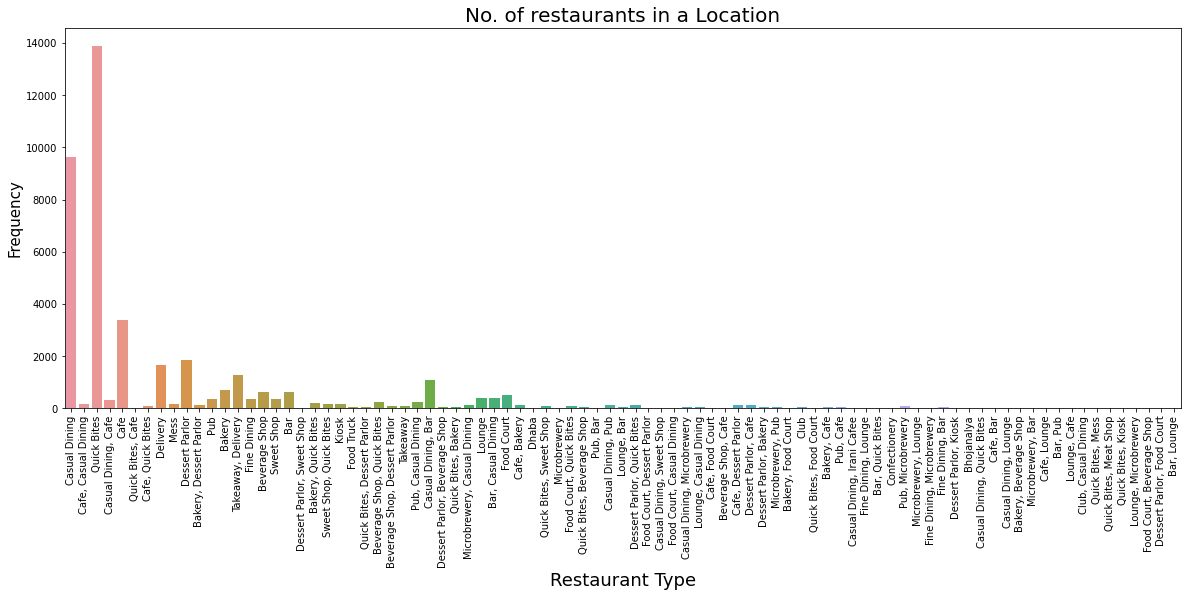

In [41]:
fig = plt.figure(figsize=(20,7))
sns.countplot(z_df['rest_type'])
plt.xticks(rotation=90)
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant Type",size=18)
plt.title('No. of restaurants in a Location', size = 20)
plt.show()

### Top 20 famous restaurant chains

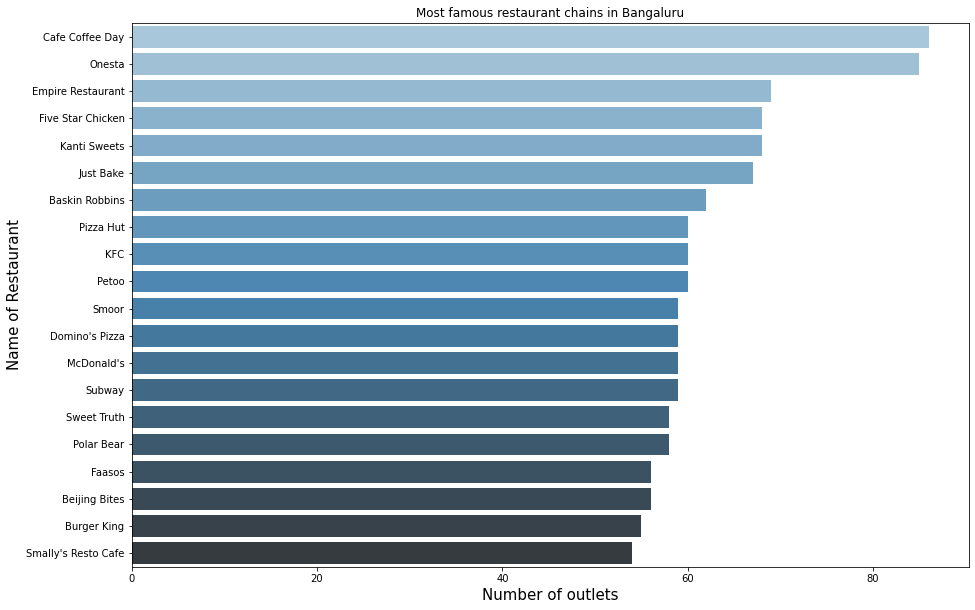

In [42]:
plt.figure(figsize=(15,10))

chains= z_df['name'].value_counts()[:20] #top 20 chains in Bangaluru

sns.barplot( x= chains, y= chains.index, palette= 'Blues_d')

plt.title("Most famous restaurant chains in Bangaluru")
plt.xlabel("Number of outlets",size=15)
plt.ylabel("Name of Restaurant", size=15);
plt.show()

### Type and Rating

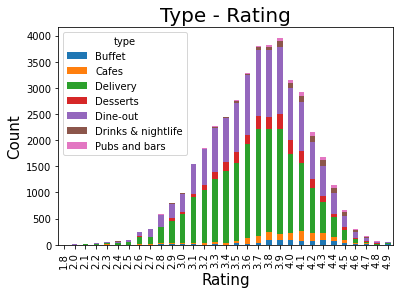

In [43]:
type_plt = pd.crosstab(z_df['rate'],z_df['type'])

type_plt.plot(kind='bar',stacked=True)

plt.ylabel('Count',size=15)
plt.xlabel('Rating',size=15)
plt.title('Type - Rating', size=20)

plt.show()

### Top type of restaurants 

In [44]:
def Average(lst):
    return sum(lst)/len(lst)

res_type = list(z_df['rest_type'].value_counts().index[:10])

avg_rate = []
for i in res_type:
    avg = Average(z_df.rate[z_df['rest_type']== i].values)
    avg_rate.append(avg)

np_array = np.array(avg_rate)
avg_rate = list(np.around(np_array, 1))
avg_rate

[3.5, 3.7, 3.8, 3.9, 3.6, 3.5, 4.1, 3.6, 3.6, 3.7]

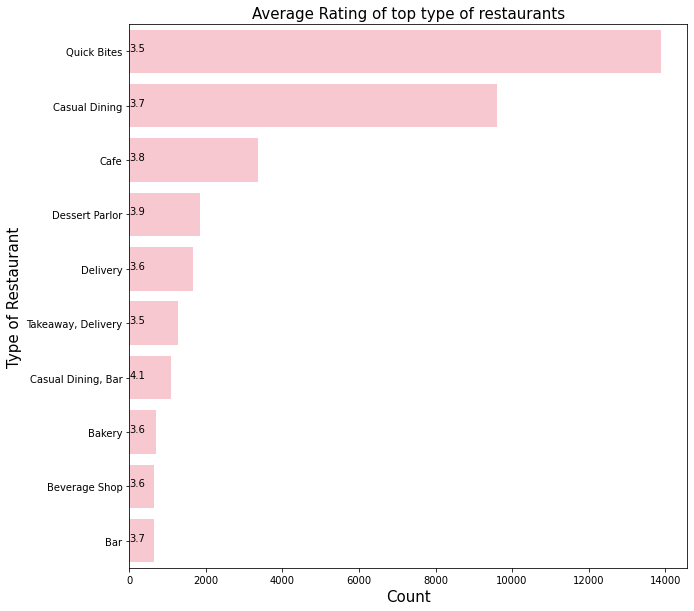

In [45]:
fig = plt.figure(figsize=(10,10))

res_type = z_df['rest_type'].value_counts()[:10]

sns.barplot( x= res_type, y= res_type.index, color= 'pink')

for index, value in enumerate(avg_rate):
            plt.text(value, index, str(value))
        
plt.xlabel('Count',size=15)
plt.ylabel('Type of Restaurant',size=15)
plt.title('Average Rating of top type of restaurants' ,size=15)
plt.show()

### Rating and cost

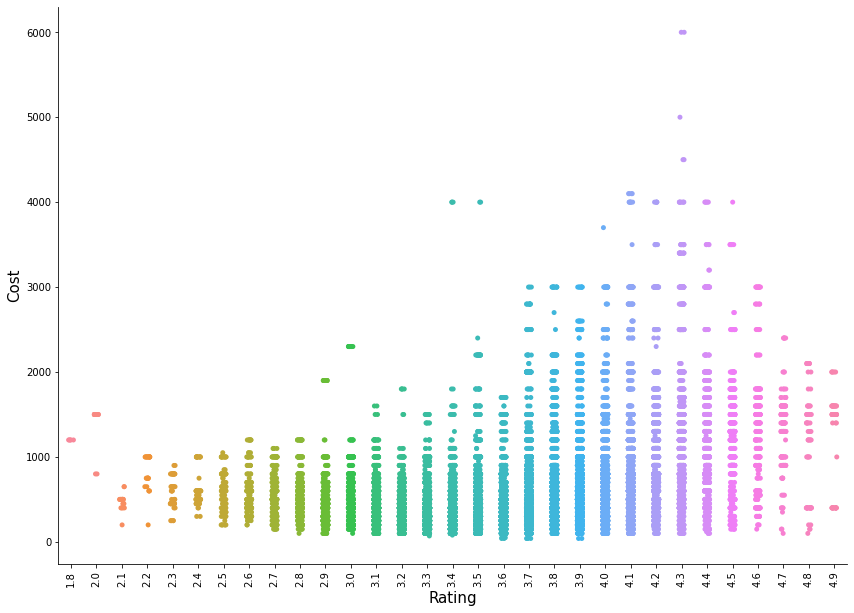

In [46]:
sns.catplot(x = 'rate', y = 'cost', data = z_df, height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=90)
plt.xlabel('Rating',size=15)
plt.ylabel('Cost',size=15)
plt.show()